 # 1. Problem Statement :-

- -  ### Problem Statement 2 :

An online retail store is trying to understand the various customer purchase patterns for their

firm, you are required to give enough evidence based insights to provide the same.



# 2. Project Objective :-

- - ### The objective of this project is to 


1. Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.


2. Segment the customers based on their purchasing behavior.

# 3. Data Description :-

- - ### Dataset Information:
The online_retail.csv contains 387961 rows and 8 columns.


| **Feature Name** | **Description** |
| --- | --- |
| Invoice | Invoice number|
|StockCode | Product ID|
|Description | Product Description|
|Quantity | Quantity of the product|
|InvoiceDate | Date of the invoice|
|Price | Price of the product per unit|
|CustomerID | Customer ID|
|Country | Region of Purchase|

# 4. Data Pre-processing Steps and Inspiration :- 

- - ### Import packages

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')


- - ###   Import data

In [3]:
#Show the first the five rows from dataset 
Ret_df=pd.read_csv('./dataSet/OnlineRetail (3).csv',encoding='latin1')
Ret_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 4.0  Exploratory data analysis( EDA ) 

## 4.1.0 Univariate analysis

> - -  ##### 4.1.1 Non-Graphical EDA :

In [4]:
# display the shape of the dataset 
Ret_df.shape

(541909, 8)

- #### Observations :- 

   - The dataset is containt of 541909  Rows and 8 Columns 

In [5]:
#Check the info 
Ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


> - #### Observations :- 
   - We have null values in Description ,CustomerID features 
   - We need to change the InvoiceDate column data type into datetime64
   - also change the CustomerID dtype into int 

- - ### Check the null values and Handling :- 

In [6]:
# Check the null values by using sum function 
Ret_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- #### Observations :- 

  - the Description column is containt 1454 null values 

  - the CustomerID column is containt 135080 null values

In [7]:
# Check the null values by percentage  
Ret_df.isnull().sum()/len(Ret_df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

 - - Handlling the null values 

In [8]:
# drop the null values 
Ret_df=Ret_df.dropna()

In [9]:
Ret_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# change the CustomerID  feature dataType into int dtype 

Ret_df['CustomerID'] = Ret_df['CustomerID'].astype(int)

# this statement to show the dtype of column 
print(Ret_df['CustomerID'].dtypes)

int32


In [11]:
# change the InvoiceDate  feature dataType into datetime dtype 

Ret_df['InvoiceDate']=pd.to_datetime(Ret_df['InvoiceDate'])

# this statement to show the dtype of column 
print(Ret_df['InvoiceDate'].dtypes)

datetime64[ns]


In [12]:
# Summary Statistics for numeric attribute using describe function
Ret_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


> - #### Observations :- 
| **Quantity** | **Breakdown** | 
|---|---|
|Mean value|  The mean value of the 'Quantity' attribute is 13, indicating that, on average, the quantity of items ordered is 13 .|
|Standard deviation |  The standard deviation of the 'Quantity' attribute is 180.42, which measures the dispersion or spread of the quantity values around the mean. A high standard deviation suggests that the quantity values are spread out over a wide range from the mean. | 
|Range of values|The range of values for the 'Quantity' attribute varies from 1.0 to 80995, indicating the minimum and maximum values observed in the dataset.|
|1st quartile (Q1)|  The 1st quartile (Q1) is 2, meaning that 25% of the observations have a quantity value less than or equal to 2. This also implies that the lower 25% of the data is below 2.|
|3rd quartile (Q3)|The 3rd quartile (Q3) is 12, indicating that 75% of the observations have a quantity value less than or equal to 12. This means that the upper 25% of the data is above 12.|
|Dispersion| The statement suggests that the interquartile range (the difference between Q3 and Q1) is larger than the difference between the minimum and Q1, indicating that there is more dispersion or variability in the data above the median (13) than below it.|
  |Skewness| The difference between mean & median is significantly high and the difference between 3rd quartile & maximum made the distribution right skewed.|
|**UnitPrice**|**Breakdown** |  
|Mean value|  TThe mean value of the 'UnitPrice' attribute is 3, indicating that, on average, the unit price of items is 3.|
|Standard deviation | The standard deviation of the 'UnitPrice' attribute is 22.09, indicating the average deviation of each observation from the mean. A high standard deviation suggests that the unit prices vary widely from the mean. | 
|Range of values|The 'UnitPrice' attribute varies from -0.0 to 8142.75, indicating the minimum and maximum unit prices observed in the dataset.|
|1st quartile (Q1)| The 1st quartile is 1.25, meaning that 25% of the observations have a unit price less than or equal to 1.25.|
|3rd quartile (Q3)|The 3rd quartile is 3.75, indicating that 75% of the observations have a unit price less than or equal to 3.75.|
|Dispersion|  The difference between the 1st quartile and the minimum is lesser than the difference between the 3rd quartile and the maximum, suggesting that the data is more dispersed after the value 3.75.|
  |Skewness|The difference between the mean and median is significantly high, indicating potential skewness in the distribution. Additionally, the difference between the 3rd quartile and the maximum contributes to the right skewness of the distribution.|




In [13]:
#print the number of transactions
print('The Number of Transactions is: ', len(Ret_df['InvoiceNo']))

The Number of Transactions is:  406829


- #### Observations :- 

  - We have 406829 transactions 


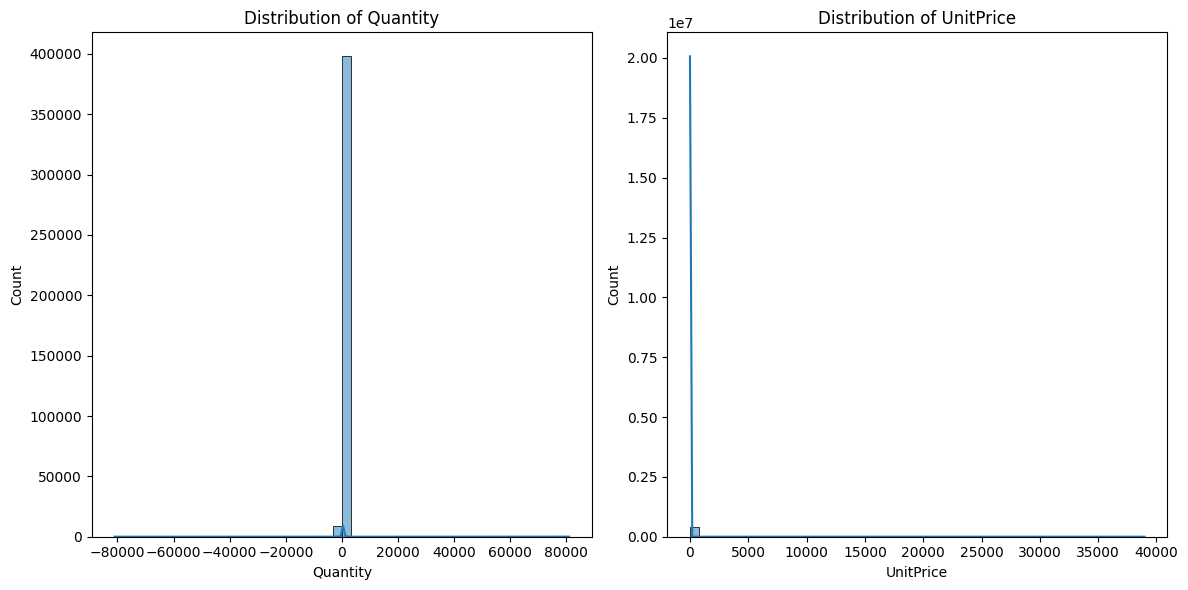

In [14]:
# Visualize the distribution of the Quantity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Ret_df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')

# Visualize the distribution of the UnitPrice
plt.subplot(1, 2, 2)
sns.histplot(Ret_df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- ### Observations :- 

    ##### Distribution of Quantity : 

    - The distribution of the Quantity column is right-skewed, suggesting that most transactions involve a small quantity of items.
      
      ##### Distribution of UnitPrice:

    -  The distribution of UnitPrice is also right-skewed, indicating that most products have lower unit prices.

- - ### 5.2.2  the distribution of categorical variables

> - - ### ***4.1.2 Univarate EDA :-*** 
- - #####  Non-Graphical EDA :
 - - #####  Graphical EDA :

In [15]:
#check the cancled order saved in variable called Order_cancled
order_cacled=Ret_df[Ret_df['InvoiceNo'].str.contains('C')].value_counts().reset_index().rename(columns={0:'order_cancled'})
order_cacled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_cancled
0,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom,4
1,C538341,22976,CIRCUS PARADE CHILDRENS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,United Kingdom,3
2,C538341,22730,ALARM CLOCK BAKELIKE IVORY,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom,3
3,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom,3
4,C570556,22568,FELTCRAFT CUSHION OWL,-144,2011-10-11 11:10:00,3.39,16029,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
8867,C551388,22902,TOTE BAG I LOVE LONDON,-12,2011-04-28 11:41:00,2.10,17874,United Kingdom,1
8868,C551386,M,Manual,-1,2011-04-28 11:38:00,1.01,16422,United Kingdom,1
8869,C551348,22990,COTTON APRON PANTRY DESIGN,-100,2011-04-28 09:49:00,4.25,12415,Australia,1
8870,C551336,22960,JAM MAKING SET WITH JARS,-1,2011-04-27 16:53:00,4.25,13993,United Kingdom,1


In [16]:
grouped_data=order_cacled.groupby(['CustomerID','Country','order_cancled']).size().reset_index().rename(columns={0:'order_cancled Count'})

grouped_data


,CustomerID,Country,order_cancled,order_cancled Count
0,12346,United Kingdom,1,1
1,12352,Norway,1,10
2,12359,Cyprus,1,6
3,12362,Belgium,1,8
4,12365,Cyprus,1,1
...,...,...,...,...
1605,18272,United Kingdom,1,4
1606,18274,United Kingdom,1,11
1607,18276,United Kingdom,1,2
1608,18277,United Kingdom,1,1


In [17]:
# calculate the cancled order by country 
grouped_data1 = grouped_data.groupby(['Country', 'order_cancled']).size().reset_index(name='Count')

# Sort the combinations by count in descending order and display the top 10
top_10_combinations = grouped_data1.sort_values(by='Count', ascending=False).head(10)

# Display the top 10 combinations
print(top_10_combinations)

            Country  order_cancled  Count
28   United Kingdom              1   1411
12          Germany              1     55
10           France              1     32
29   United Kingdom              2     17
24            Spain              1     12
2           Belgium              1     10
26      Switzerland              1     10
15            Italy              1      7
21         Portugal              1      6
3   Channel Islands              1      5


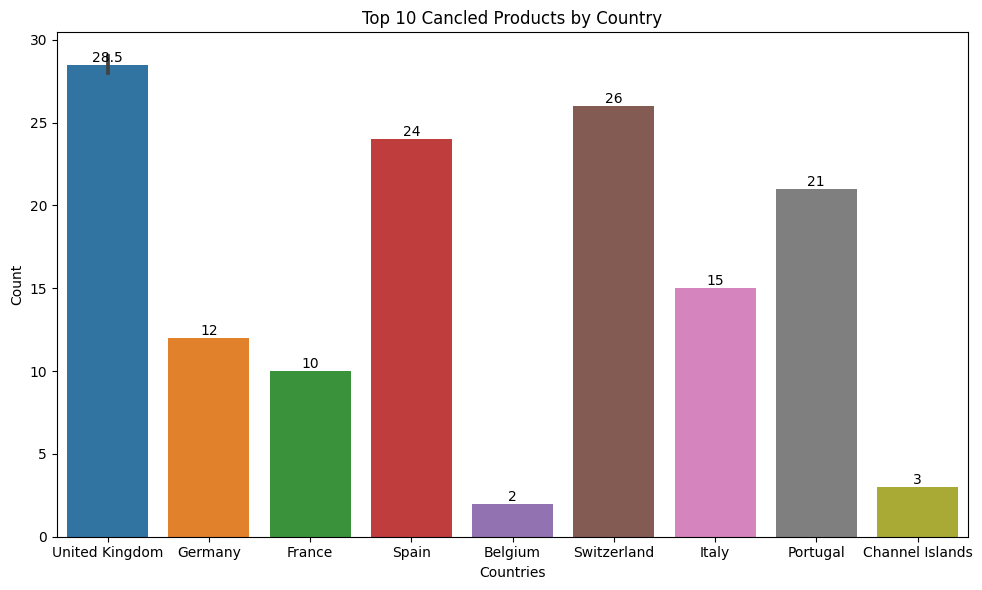

In [18]:
plt.figure(figsize=(10, 6))
top_Stock_orde_C = top_10_combinations = grouped_data1.sort_values(by='Count', ascending=False).head(10)
ax=sns.barplot(x=top_Stock_orde_C['Country'].values, y=top_Stock_orde_C['Count'].index)
plt.title('Top 10 Cancled Products by Country')
plt.xlabel('Countries')
plt.ylabel('Count')

for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.show()

- #### Observations :- 

    - The United Kingdom is heights country of cancled order 28.5 % 

In [19]:
order_cacled['order_cancled'].sum()

8905

- #### Observations :- 

     We have 8905 order cancled  

In [20]:
# drop the consolation orders 
Ret_df=Ret_df[~Ret_df['InvoiceNo'].str.contains('C')]

In [21]:
# Top 10 products by Description sold
top_products = Ret_df['Description'].value_counts().head(10)
top_products

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

In [22]:
# Top 10 products by Country sold
top_10_Country = Ret_df['Country'].value_counts().head(10)
top_10_Country

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

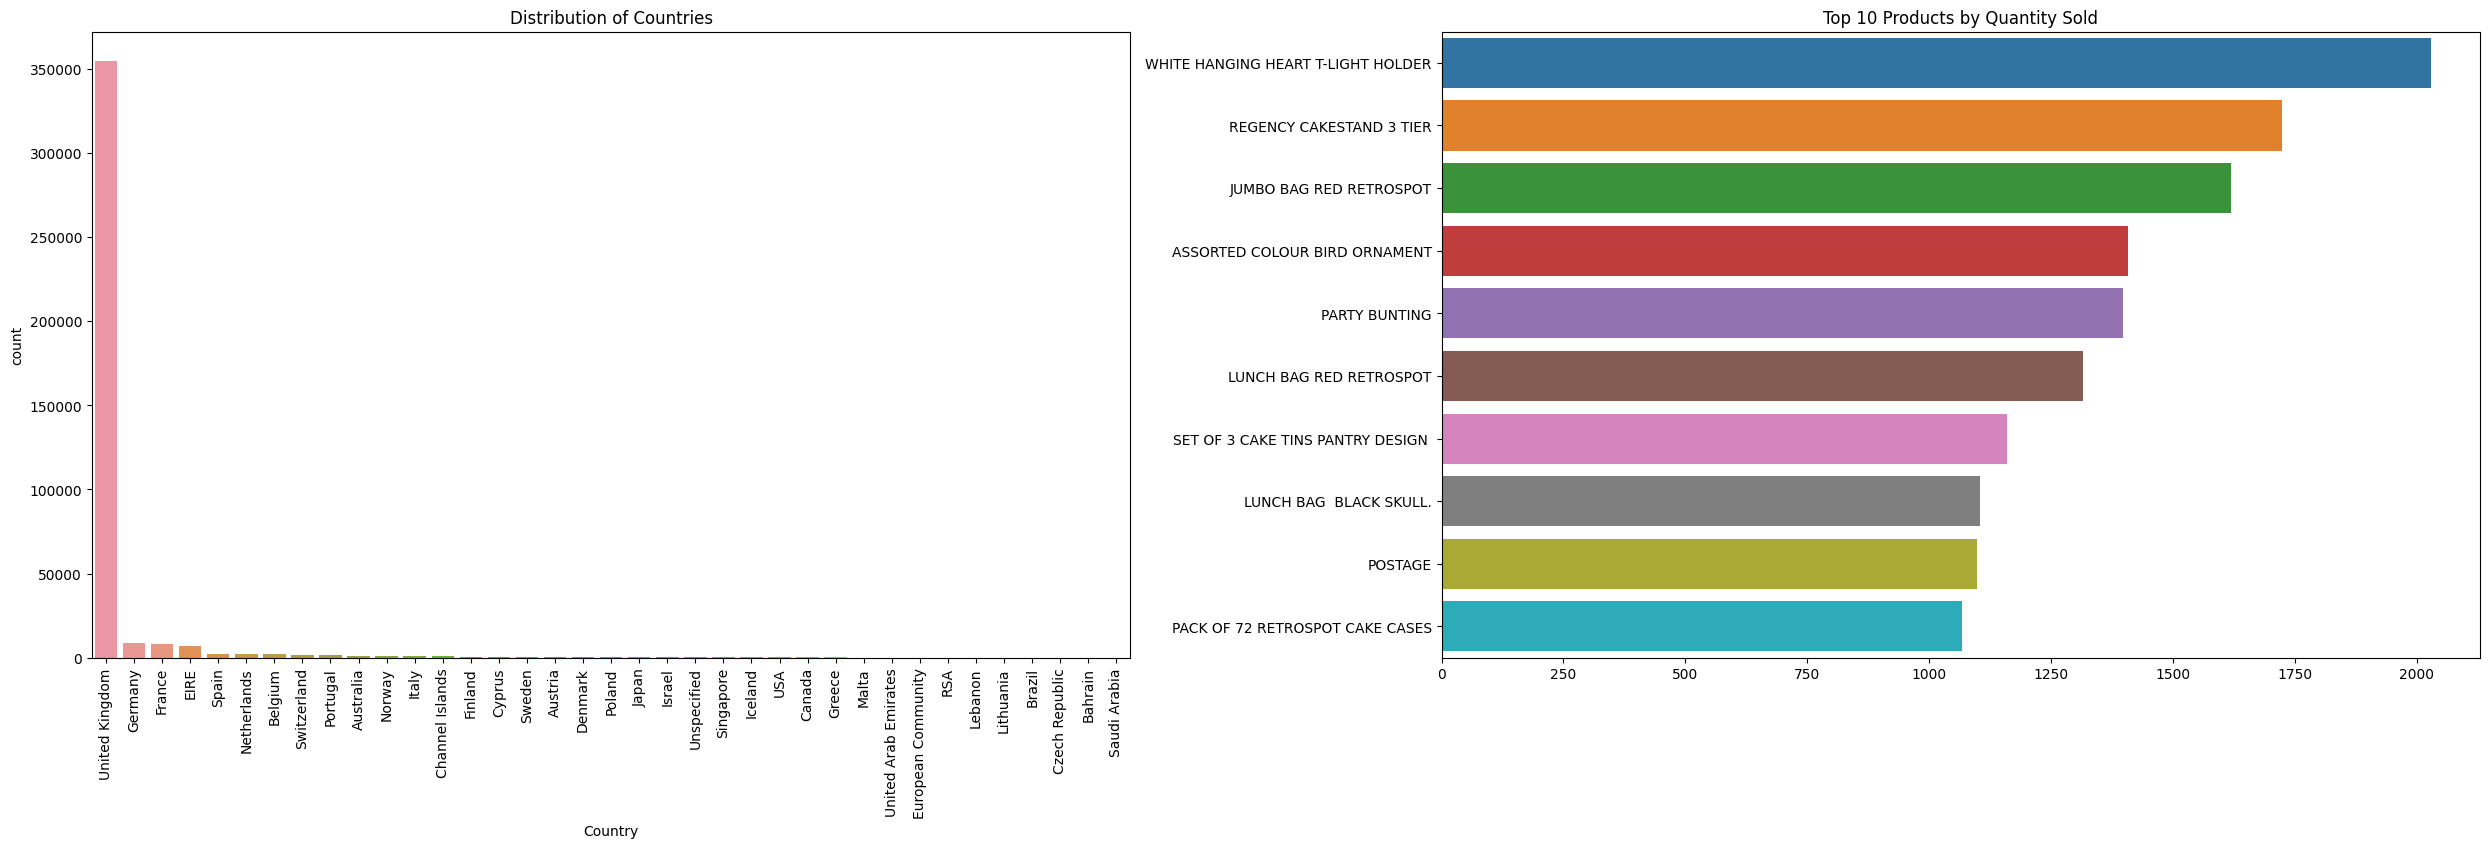

In [23]:
# Visualize the distribution of categorical variables
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 3)
sns.countplot(x='Country', data=Ret_df, order=Ret_df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Countries')

#  Top 10 products by quantity sold
top_products = Ret_df['Description'].value_counts().head(10)
plt.subplot(2, 2, 4)
sns.barplot(x=top_products.values, y=top_products.index, orient='h')
plt.title('Top 10 Products by Quantity Sold')

plt.tight_layout()
plt.show()

- ### Observations :- 

    ##### Distribution of Countries :  

    - United Kingdom is Highest salling produuct almost 354345 unitsware sold .
    
    - Germany is 2and sailing product almost 9042 unitsware sold .
      
    ##### Distribution of Quantity:

    - WITH HANGING HEART T-LIGHT HODER is Highest salling produuct almost 2028 unitsware sold .
    
    - REGENCY CAKESTAND 3 TIER is 2and salling produuct almost 1724 unitsware sold .


- - ###  Top 10 quantity by Stock sold

In [24]:
# Top 10 quantity by Stock sold
top_Stock = Ret_df['StockCode'].value_counts().head(10)
top_Stock

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
Name: StockCode, dtype: int64

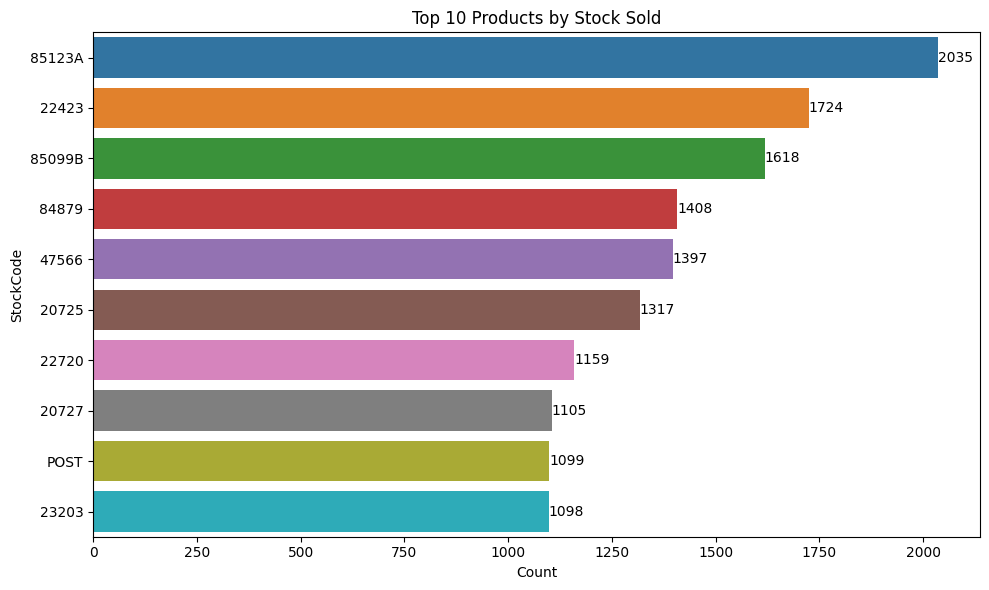

In [25]:
# Visualize the Top 10 quantity by Stock sold
plt.figure(figsize=(10, 6))
top_Stock = Ret_df['StockCode'].value_counts().head(10)
ax=sns.barplot(x=top_Stock.values, y=top_Stock.index)
plt.title('Top 10 Products by Stock Sold')
plt.xlabel('Count')
plt.ylabel('StockCode')

for label in ax.containers:
    ax.bar_label(label)
    
plt.tight_layout()
plt.show()

- ### Observations :- 

    ##### Top 10 quantity by Stock sold : 

    - Stock 85123A is Highest salling produuct almost 2035 units ware sold .
    
    - 22423 is 2and salling produuct almost 1724 units ware sold .


- - ###   sales over time 

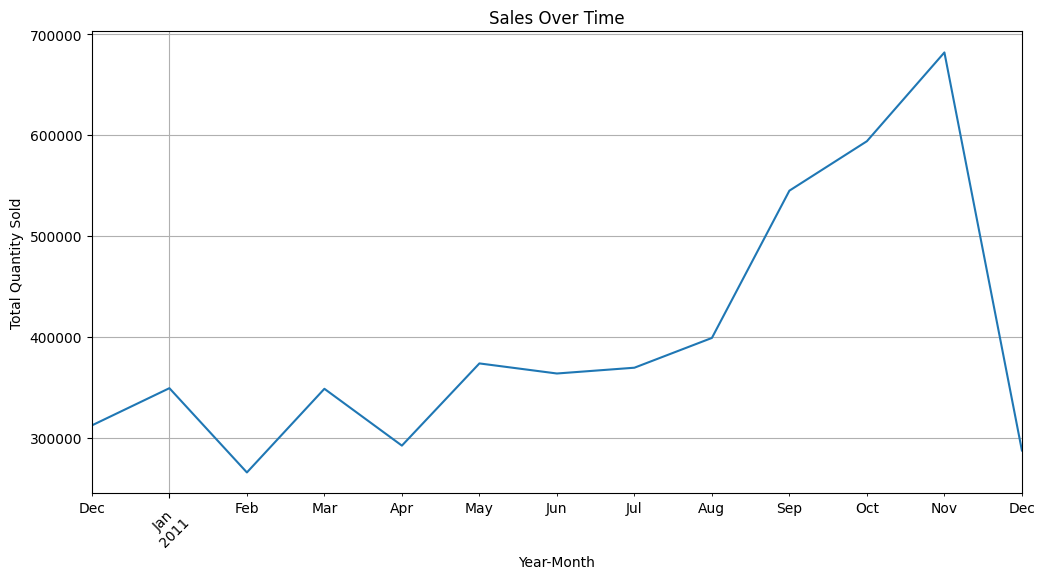

In [26]:
# Visualize sales over time
Ret_df['InvoiceDate'] = pd.to_datetime(Ret_df['InvoiceDate'])
Ret_df['YearMonth'] = Ret_df['InvoiceDate'].dt.to_period('M')
sales_over_time = Ret_df.groupby('YearMonth')['Quantity'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()


- ### Observations :- 

    ##### sales over time : 

    - Trend Over Time: The line plot shows the trend in total quantity sold over a period of time, broken down by year and month..
    
    - Seasonality: You can observe that there are fluctuations in sales that seem to follow a repeating pattern, indicating seasonality in the data. Seasonality refers to

       the regular, predictable variations in sales that occur at specific times of the year.
     
    - Increasing Trend: From the plot, it appears that there is an overall increasing trend in total quantity sold. This suggests that the business may be growing over 
     
       time, selling more products as time progresses

> - - ## 4.1.3 Cohor Analysis

- - ###  Assigned the cohorts and calculated the monthly offset

In [27]:
import datetime as dt
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
    return dt.datetime(x.year,x.month,1)

# Create InvoceDate column based on month and store in InvoiceMonth
Ret_df['InviceMonth']=Ret_df['InvoiceDate'].apply(get_month)

# Grouping by customer_id and select the InvoiceMonth value
groping_by_ID=Ret_df.groupby('CustomerID')['InviceMonth']

# Assigning a minimum InvoiceMonth value to the dataset
Ret_df['CohortMonth']=groping_by_ID.transform('min')

Ret_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,InviceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12,2011-12-01,2011-08-01


- - - ###  Calculating  time offset in Month as  Cohort Index

        

In [28]:
#create a date element function to get a series for subtraction
def get_dete_elements(df,column):
    day=df[column].dt.day
    month=df[column].dt.month
    year=df[column].dt.year
    return day,month,year

#get the elements for our InviceMonth columns 
_,invoice_month,invoice_year= get_dete_elements(Ret_df,'InviceMonth')

#get the elements for our CohortMonth columns 
_,cohor_month,cohor_year= get_dete_elements(Ret_df,'CohortMonth') 

- - - ###  calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
        
         -  then calculate the total Months difference between the two. 

In [29]:
#  Get the  difference in years
years_diff=invoice_year - cohor_year

# Calculate difference in months
months_diff=invoice_month - cohor_month

#create cohorIndex 
Ret_df['CohortIndex']=years_diff * 12 + months_diff + 1

Ret_df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,InviceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12,2011-12-01,2011-08-01,5


 Here, at first we create a *groupby()* object with *CohortMonth and CohortIndex* and store it as daily_active. 
 
Then, we call this object, select the *customer_id* column and calculate the average.

Then we store the results as *cohort_data*. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.
 
Finally, we create a pivot table by passing 
* *CohortMonth* to the index parameter,
* *CohortIndex* to the columns parameter, 
* *customer_id* to the values parameter. 

and rounding it up to 1 digit, and see what we get.

In [30]:
# Counting daily active user from each chort
daily_active=Ret_df.groupby(['CohortMonth','CohortIndex'])

# Counting number of unique customerId's falling in each group of CohortMonth and CohortIndex
cohort_data=daily_active['CustomerID'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()

# Assigning column names to the dataframe created above
cohor_counts=cohort_data.pivot(index='CohortMonth',
                               columns='CohortIndex',
                               values='CustomerID')

cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


In [31]:
cohor_counts.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- ### Observations :- 
 |**CohortMonth 2010-12-01, CohortIndex 0:**|
 |---|
|There are 885 unique customers who made transactions during the cohort month 2010-12-01, and their cohort index is 0. This means these customers made their first transaction during this month.|
|**CohortMonth 2010-12-01, CohortIndex 1:**|
|Out of the 885 customers who made their first transaction during the cohort month 2010-12-01, 324 of them also made transactions during the next month (CohortIndex 1). This indicates that these 324 customers remained active after their first transaction month.|

- - - ###  Calculate business metrics: Retention rate

    - calculate retention count for each cohort Month paired with cohort Index

    - create a pivot table for this purpose

In [32]:
 #Select the first column and store it to cohort_sizes as size of cohort === no. active customer in first day
 #We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
cohort_size=cohor_counts.iloc[:,0]

#We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index
retention=cohor_counts.divide(cohort_size,axis=0)


In [33]:
#Converting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- - - #### Visualizing the retention rate

   - - set the index of our Retention rate dataframe to a more readable string format

In [34]:
#change the index of our Retention rate dataframe to a more readable string format
retention.index= retention.index.strftime("%B %Y")

retention.index

Index(['December 2010', 'January 2011', 'February 2011', 'March 2011',
       'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011',
       'September 2011', 'October 2011', 'November 2011', 'December 2011'],
      dtype='object', name='CohortMonth')

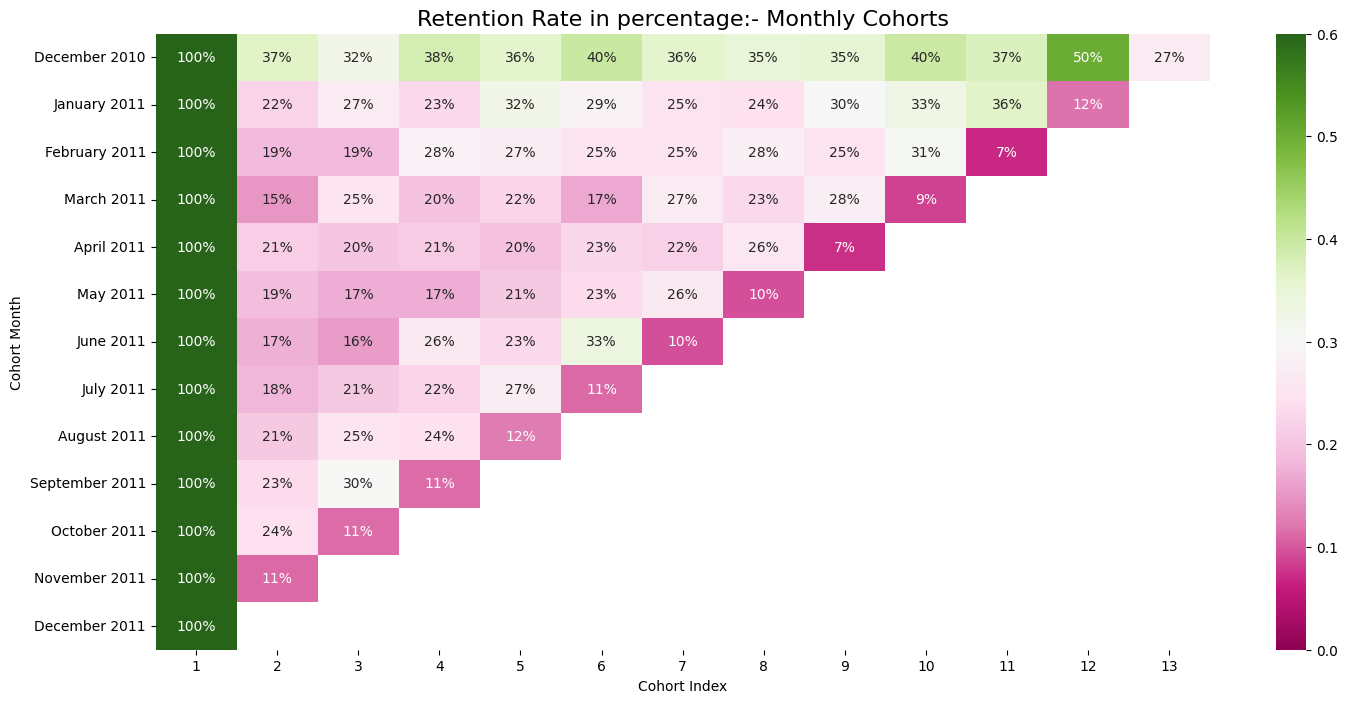

In [35]:
# Initialize the figure
plt.figure(figsize=(17,8))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts',fontsize=16)

# Creating the seaborn based heatmap
sns.heatmap(data=retention,annot=True,fmt='.0%',cmap='PiYG',vmin=0.0,vmax=0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

- ### Observations :- 
 |**CohortMonth December 2010**|
 |---|
|The average retention rate for the cohort month December 2010 is 37%. This means that, on average, 37% of the customers who made their first transaction in December 2010 remained active in the subsequent months.|
|The highest retention rate of 50% occurs after 11 months. This indicates that after 11 months from their first transaction month, 50% of the customers who joined in December 2010 are still active.|
|**Other CohortMonths**|
|For all other cohort months, the average retention rates are around 19-25%. This suggests that the retention rates for these months are lower compared to December 2010|
|**Overall Retention Percentage**|
|Only a certain percentage of users, around 19-25%, are making transactions again in the given CohortIndex ranges. This implies that while there is some level of retention across different cohort months, a significant portion of users may not be returning to make transactions in subsequent months.|

### Average standard cost monthly cohort

In [36]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
agv_monthly=Ret_df.groupby(['CohortMonth','CohortIndex'])

# # Calculate the average of the UnitPrice column
cohort_data_avg=agv_monthly['UnitPrice'].mean()

# Reset the index of cohort_data_avg before pivot
cohort_data_avg=cohort_data_avg.reset_index()

#Create a pivot 
average_UnitPrice=cohort_data_avg.pivot(index='CohortMonth',
                                        columns='CohortIndex',
                                        values='UnitPrice')

average_UnitPrice_cost=average_UnitPrice.round(1)

average_UnitPrice_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.1,3.1,3.0,3.2,2.9,3.8,3.0,2.8,3.0,2.8,3.2,2.8,2.7
2011-01-01,3.2,3.5,3.0,5.7,3.1,3.1,2.9,2.7,2.6,4.2,2.8,2.5,NaN
2011-02-01,3.3,3.8,3.8,3.1,2.9,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,4.2,3.4,3.2,3.0,2.7,2.8,2.8,2.7,2.4,NaN,NaN,NaN
2011-04-01,3.4,3.7,3.3,2.7,2.9,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN


In [37]:
average_UnitPrice_cost.index=average_UnitPrice_cost.index.strftime('%B %Y')
average_UnitPrice_cost.index

Index(['December 2010', 'January 2011', 'February 2011', 'March 2011',
       'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011',
       'September 2011', 'October 2011', 'November 2011', 'December 2011'],
      dtype='object', name='CohortMonth')

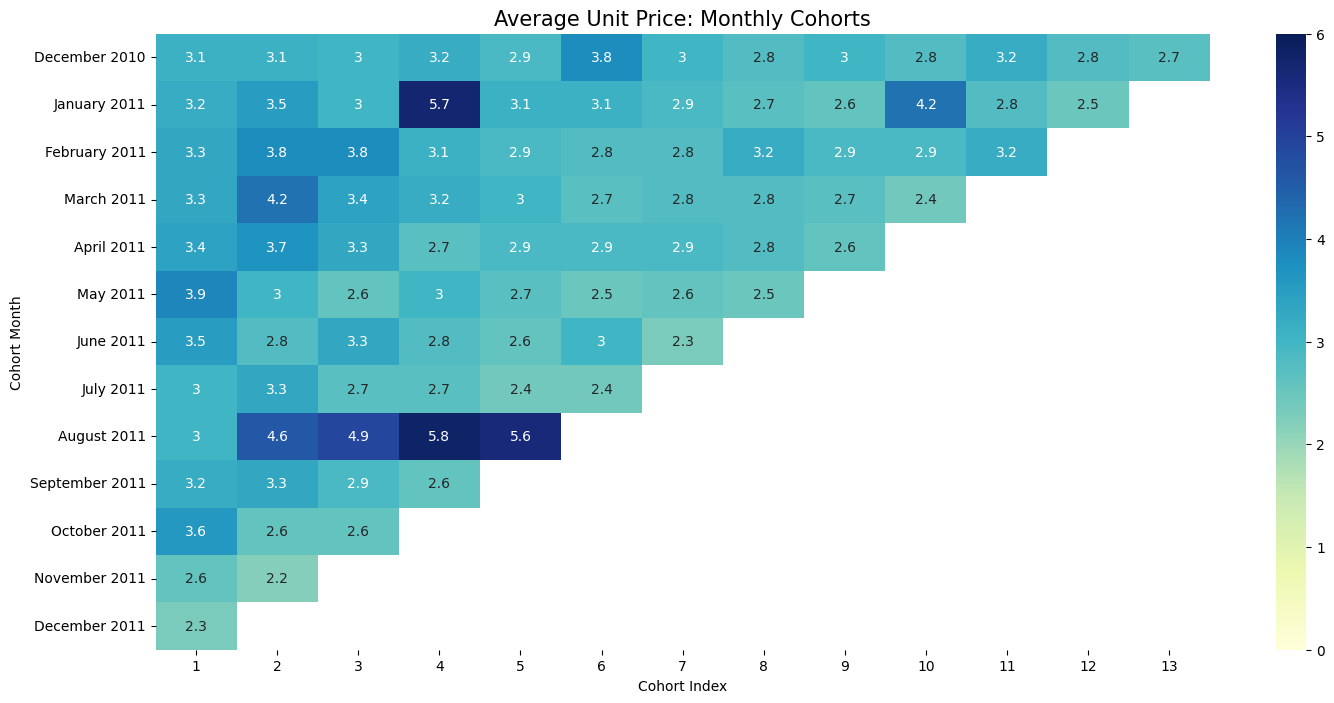

In [38]:
# Initialize the figure
plt.figure(figsize=(17,8))

# Adding a title
plt.title('Average Unit Price: Monthly Cohorts',fontsize=15)

# Creating the seaborn based heatmap
sns.heatmap(data=average_UnitPrice_cost,annot=True,cmap='YlGnBu',vmin=0.0,vmax=6.0)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

> - - ### 4.1.4 RFM Analysis

In [39]:
# calculate the total price 
Ret_df['TotalPrice']=Ret_df['Quantity']*Ret_df['UnitPrice']

Ret_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,InviceMonth,CohortMonth,CohortIndex,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01,2010-12-01,1,20.34


In [40]:
Ret_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [41]:
# extract the last date of purchase
last_date=dt.datetime(2011,12,10)
last_date

datetime.datetime(2011, 12, 10, 0, 0)

In [42]:
# RFM 
rfm=Ret_df.groupby('CustomerID').agg({'InvoiceDate':lambda date:(last_date - date.max()).days,
                                      'InvoiceNo':lambda num:(num.nunique()),
                                      'TotalPrice':lambda TotalPrice:(TotalPrice.sum())})
                                     
rfm                                     

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [43]:
#rename the columns 
rfm.columns=['Recency','Frequency','Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [44]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,92.041484,100.007757,0.0,17.000,50.00,141.50,373.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


- - - ###  Distribution of Recency , Frequency , Monetary


      - ##### Distribution of Recency

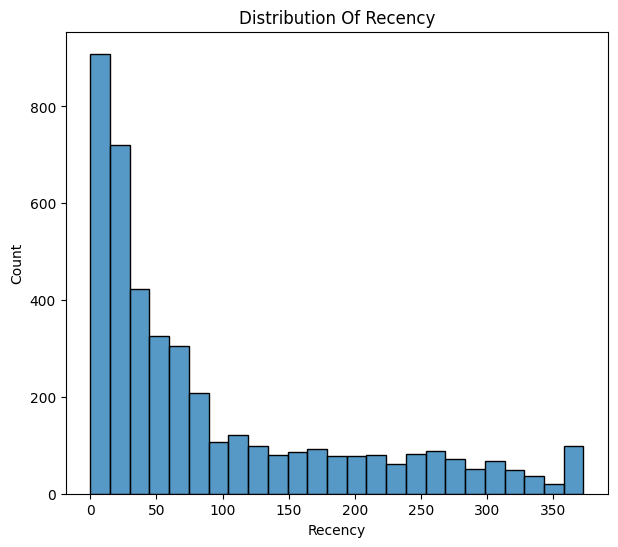

In [45]:
# plting the Recency 
plt.figure(figsize=(7,6))
sns.histplot(x=rfm['Recency'])
plt.title('Distribution Of Recency')
plt.show();


- ### Observations :- 

    ##### RECENCY : 

    - Distribution of Recency is right skewed..

- ##### Distribution of Frequency

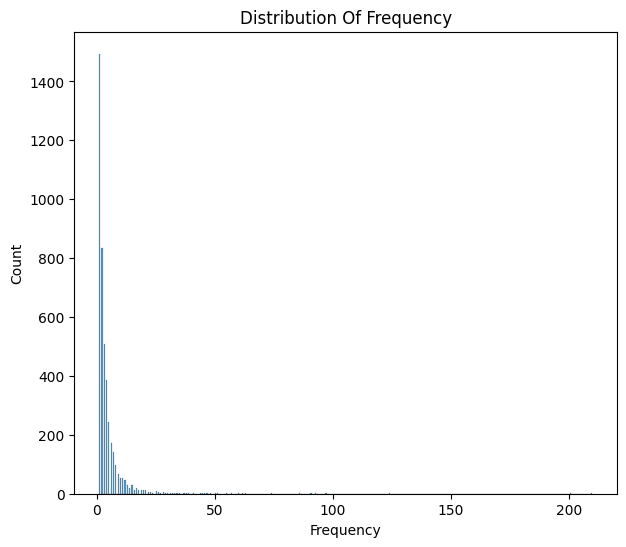

In [46]:
# plting the Frequency 
plt.figure(figsize=(7,6))
sns.histplot(x=rfm['Frequency'])
plt.title('Distribution Of Frequency')
plt.show();

- ### Observations :- 

    ##### FREQENCY : 

    - Distribution of Freqency is highly right skewed..

- ##### Distribution of Monetary

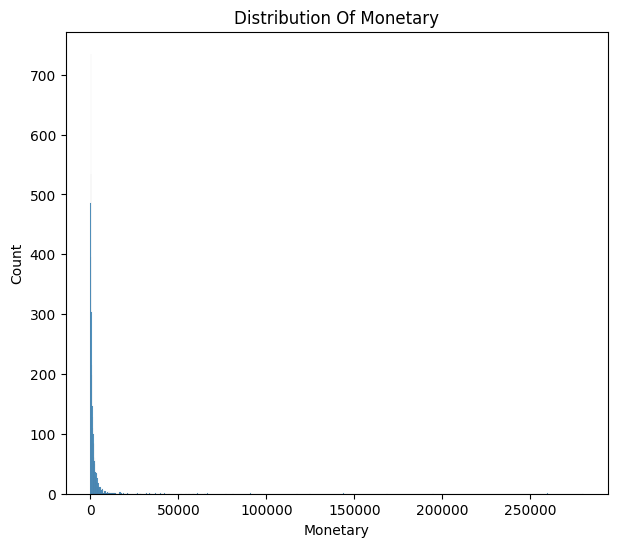

In [47]:
# plting the Monetary 
plt.figure(figsize=(7,6))
sns.histplot(x=rfm['Monetary'])
plt.title('Distribution Of Monetary')
plt.show();

- ### Observations :- 

    ##### FREQENCY : 

    - Distribution of Monetary is highly right skewed..

- - - ### Calculate the  R, F and M segments

      - ##### Split the data into four segment using Quantile .
      - ##### Converting quantiles to a dictionary .
      - ##### Functions to create R, F and M segments .
      - ##### Add a new column to combine RFM score .
      - ##### Calculate and Add RFMScore value column showing total sum of RFMGroup values .
      

In [48]:
#split data into four segment quantile
quntile=rfm.quantile(q=[0.25,0.50,0.75])

In [49]:
#Converting quantiles to a dictionary
quntile=quntile.to_dict()
quntile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [50]:
# Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company
#this to calculate Recency
def RScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2 
    elif x <= d[p][0.75]:
        return 3 
    else:
        return 4
    
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.    
#this to calculate Frequency , Monetary
def FnMScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2 
    elif x <= d[p][0.75]:
        return 3 
    else:
        return 4

In [51]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm['R']=rfm['Recency'].apply(RScoring,args=('Recency',quntile))
rfm['F']=rfm['Frequency'].apply(FnMScoring,args=('Frequency',quntile))
rfm['M']=rfm['Monetary'].apply(FnMScoring,args=('Monetary',quntile))

rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325,1,77183.60,4,1,4
12347,2,7,4310.00,1,4,4
12348,75,4,1797.24,3,3,4
12349,18,1,1757.55,2,1,4
12350,310,1,334.40,4,1,2


In [52]:
# Add a new column to combine RFM score
rfm['RFM_Group']=rfm.R.map(str)+rfm.F.map(str)+rfm.M.map(str)

In [53]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFM_Score']=rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,4,1,4,414,9
12347,2,7,4310.00,1,4,4,144,9
12348,75,4,1797.24,3,3,4,334,10
12349,18,1,1757.55,2,1,4,214,7
12350,310,1,334.40,4,1,2,412,7


In [54]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
 3   R          4339 non-null   int64  
 4   F          4339 non-null   int64  
 5   M          4339 non-null   int64  
 6   RFM_Group  4339 non-null   object 
 7   RFM_Score  4339 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.1+ KB


In [55]:
rfm['RFM_Score'].unique()

array([ 9, 10,  7,  6,  8,  3,  5, 11,  4, 12], dtype=int64)

- ##### Assign Loyelty Level to each customer

In [56]:
#Assign Loyalty Level to each customer
loyalty_level=['Platinum','Gold','Silver','Bronze']

score_cut=pd.qcut(rfm['RFM_Score'],q=4,labels=loyalty_level)

rfm['RFM_LoyaltyLevel']=score_cut.values

rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_LoyaltyLevel
0,12346,325,1,77183.60,4,1,4,414,9,Silver
1,12347,2,7,4310.00,1,4,4,144,9,Silver
2,12348,75,4,1797.24,3,3,4,334,10,Bronze
3,12349,18,1,1757.55,2,1,4,214,7,Gold
4,12350,310,1,334.40,4,1,2,412,7,Gold


In [57]:
# Validate the data For RFM group = 111
rfm[rfm['RFM_Group']=='111'].sort_values('Monetary',ascending=False).reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_LoyaltyLevel
0,15148,10,1,301.29,1,1,1,111,3,Platinum
1,17247,15,1,282.19,1,1,1,111,3,Platinum
2,14480,11,1,279.05,1,1,1,111,3,Platinum
3,17767,15,1,271.20,1,1,1,111,3,Platinum
4,12558,7,1,269.96,1,1,1,111,3,Platinum


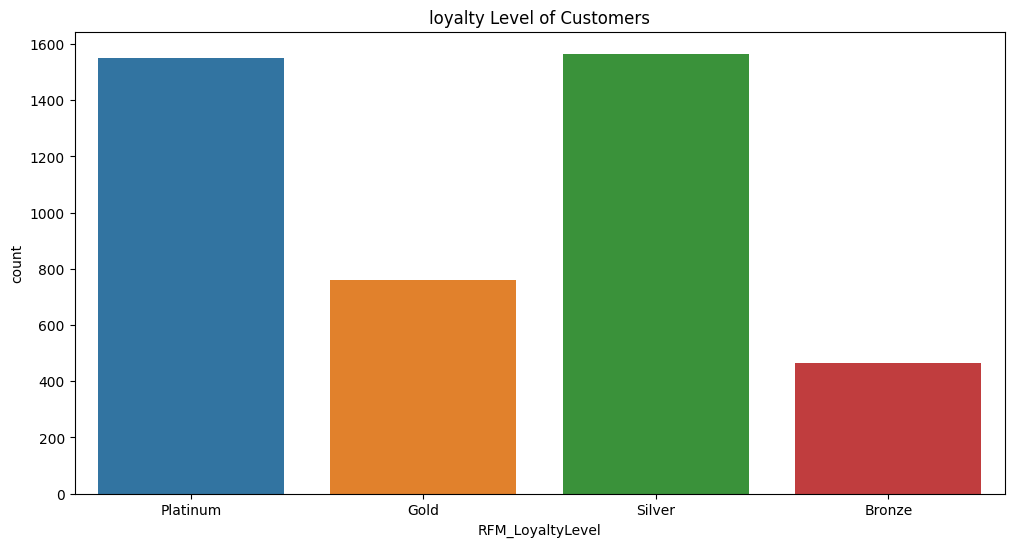

In [58]:
# Plot the loyalty level
plt.figure(figsize=(12,6))
sns.countplot(x=rfm['RFM_LoyaltyLevel'])
plt.title('loyalty Level of Customers')
plt.show()

In [59]:
rfm[rfm['RFM_LoyaltyLevel']=='Platinum'].sort_values('Monetary',ascending=False).reset_index().sample(10)


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_LoyaltyLevel
219,17805,73,1,512.31,3,1,2,312,6,Platinum
1328,14457,310,1,113.64,4,1,1,411,6,Platinum
1344,17274,35,1,111.98,2,1,1,211,4,Platinum
550,17510,24,1,308.48,2,1,2,212,5,Platinum
697,16936,25,1,262.68,2,1,1,211,4,Platinum
773,13565,19,2,240.22,2,2,1,221,5,Platinum
1547,16454,44,2,6.90,2,2,1,221,5,Platinum
913,13513,126,1,205.10,3,1,1,311,5,Platinum
1307,17654,277,1,117.55,4,1,1,411,6,Platinum
987,16448,198,1,188.89,4,1,1,411,6,Platinum


In [60]:
#segmentation the customer based on RFM
segmentation_bsed_on_FRM=rfm[['Recency','Frequency','Monetary','RFM_LoyaltyLevel']]
segmentation_bsed_on_FRM.head()

,Recency,Frequency,Monetary,RFM_LoyaltyLevel
CustomerID,,,,
12346,325,1,77183.60,Silver
12347,2,7,4310.00,Silver
12348,75,4,1797.24,Bronze
12349,18,1,1757.55,Gold
12350,310,1,334.40,Gold


In [61]:
# perform aggregation operations on the grouped data
segmentation_bsed_on_FRM.groupby('RFM_LoyaltyLevel').agg({
'Recency':['mean','min','max'],
'Frequency':['mean','min','max'],
'Monetary':['mean','min','max','count']})

Recency          Frequency              Monetary          \
                        mean min  max      mean min  max         mean     min   
RFM_LoyaltyLevel                                                                
Platinum          107.254030   0  373  1.330754   1    7   300.513721    0.00   
Gold              119.923584   0  373  2.235837   1    6   902.332912   52.00   
Silver             65.887612   0  372  7.252874   1  210  3769.880321   70.02   
Bronze             83.833693  18  372  7.380130   2   63  4010.384149  319.50   

                                   
                        max count  
RFM_LoyaltyLevel                   
Platinum            3861.00  1551  
Gold              168472.50   759  
Silver            280206.02  1566  
Bronze            124914.53   463

- #### Observations :- 

  > **For Recency :-** 
  -  ##### Platinum:
  - There are 1551 Platinum customers.
  - The average purchase interval for Platinum customers is 107 days.
  - The minimum purchase interval of 0 implies that some Platinum customers made back-to-back purchases without any time lag in between.
  - The maximum purchase interval of 373 days indicates the longest gap between purchases for Platinum customers.
   -  ##### Gold:
  - There are 759 Gold customers.
  - The average purchase interval for Gold customers is 119 days.
  - The minimum purchase interval of 0 implies that some Gold customers made back-to-back purchases without any time lag in between.
  - The maximum purchase interval of 373 days indicates the longest gap between purchases for Gold customers 
   -  ##### Silver:
  - There are 1566 Silver customers.
  - The average purchase interval for Silver customers is 65 days.
  - The minimum purchase interval of 0 implies that some Silver customers made back-to-back purchases without any time lag in between.
  - The maximum purchase interval of 372 days indicates the longest gap between purchases for Silver customers.
    -  ##### Bronze:
  - There are 463 Bronze customers.
  - The average purchase interval for Bronze customers is 83 days.
  - The minimum purchase interval of 18 days indicates that there was an 18-day gap between purchases for some Bronze customers.
  - The maximum purchase interval of 372 days indicates the longest gap between purchases for Bronze customers. 


   > **for Frequency:-**

  - ##### Platinum:
 - There are 1551 Platinum customers.
 - The average purchase frequency for Platinum customers is 1.33.
 - The minimum purchase frequency of 1 implies that some Platinum customers made only one purchase during the analyzed period.
 - The maximum purchase frequency of 7 indicates that some Platinum customers made up to 7 purchases during the analyzed period.
  - ##### Gold:
 - There are 759 Gold customers.
 - The average purchase frequency for Gold customers is 2.23.
 - The minimum purchase frequency of 1 implies that some Gold customers made only one purchase during the analyzed period.
 - The maximum purchase frequency of 6 indicates that some Gold customers made up to 6 purchases during the analyzed period.
  - ##### Silver:
 - There are 1566 Silver customers.
 - The average purchase frequency for Silver customers is 7.25.
 - The minimum purchase frequency of 1 implies that some Silver customers made only one purchase during the analyzed period.
 - The maximum purchase frequency of 210 indicates that some Silver customers made up to 210 purchases during the analyzed period.
   - ##### Bronze:
 - There are 463 Bronze customers.
 - The average purchase frequency for Bronze customers is 7.38.
 - The minimum purchase frequency of 2 implies that some Bronze customers made only two purchases during the analyzed period.
 - The maximum purchase frequency of 63 indicates that some Bronze customers made up to 63 purchases during the analyzed period.


> **for Monetary Value:-**

- ##### Platinum:

   - There are 1551 Platinum customers.
   - The average monetary value spent by Platinum customers is $300.51.
   - The minimum monetary value spent is $0.0, indicating that some Platinum customers made purchases without spending any money (possibly due to refunds or discounts).
   - The maximum monetary value spent is $3861, suggesting that some Platinum customers made high-value purchases.
     Gold:

   - There are 759 Gold customers.
   - The average monetary value spent by Gold customers is $902.33.
   - The minimum monetary value spent is $52, indicating that some Gold customers made relatively small purchases.
   - The maximum monetary value spent is $168,472.50, suggesting that some Gold customers made very high-value purchases.
     - ##### Silver:

   - There are 1566 Silver customers.
   - The average monetary value spent by Silver customers is $3769.88.
   - The minimum monetary value spent is $70.02, indicating that some Silver customers made relatively small purchases.
   - The maximum monetary value spent is $280,206.02, suggesting that some Silver customers made very high-value purchases.
    - #####  Bronze:

   - There are 463 Bronze customers.
   - The average monetary value spent by Bronze customers is $4010.38.
   - The minimum monetary value spent is $319.50, indicating that some Bronze customers made relatively small purchases.
   - The maximum monetary value spent is $124,914.53, suggesting that some Bronze customers made very high-value purchases.

- - - ###  Handle negative and zero values so as to handle infinite numbers during log transformation

In [62]:
#function to Handle negative and zero values 
def handle_neg_n(num):
    if num<=0:
        return 1
    else:
        return num
    

#Applying the handle_neg_n function to Recency and Monetary columns 
rfm['Recency']=[handle_neg_n(x) for x in rfm.Recency]
rfm['Monetary']=[handle_neg_n(x) for x in rfm.Monetary]


In [63]:
from sklearn.preprocessing import StandardScaler
#Perform Log transformation to bring data into normal or near normal distribution
log_rfm_df=rfm[['Recency','Frequency','Monetary']].apply(np.log)


# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(log_rfm_df)

# Scale and center the data
data_normalized = scaler.transform(log_rfm_df)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=log_rfm_df, index=log_rfm_df.index, columns=log_rfm_df.columns)

In [64]:
data_norm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,5.783825,0.000000,11.253942
12347,0.693147,1.945910,8.368693
12348,4.317488,1.386294,7.494007
12349,2.890372,0.000000,7.471676
12350,5.736572,0.000000,5.812338


> ***Now let's Visualize the Distribution of Recency,Frequency and Monetary.***

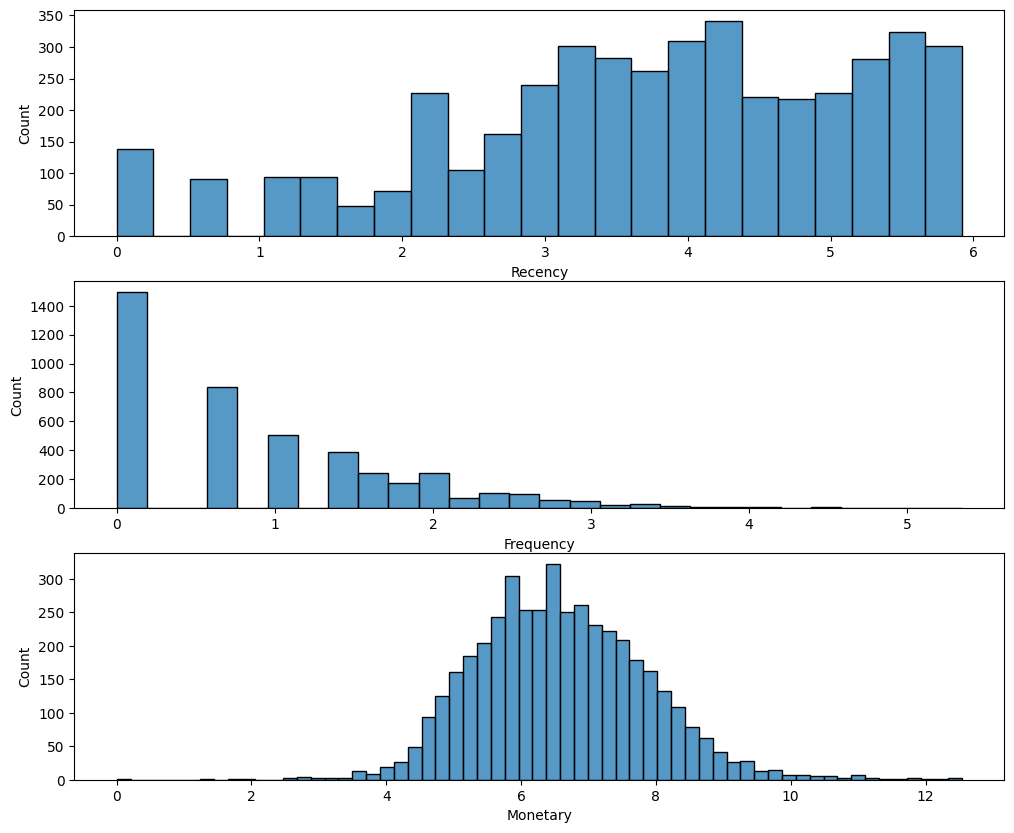

In [65]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(data_norm['Monetary'])

# Show the plot
plt.show()

- - - # 5.0.0 **KMeans Clustering:**

> - - ***Build the model .***

In [66]:
#Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn.cluster import  KMeans

In [67]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

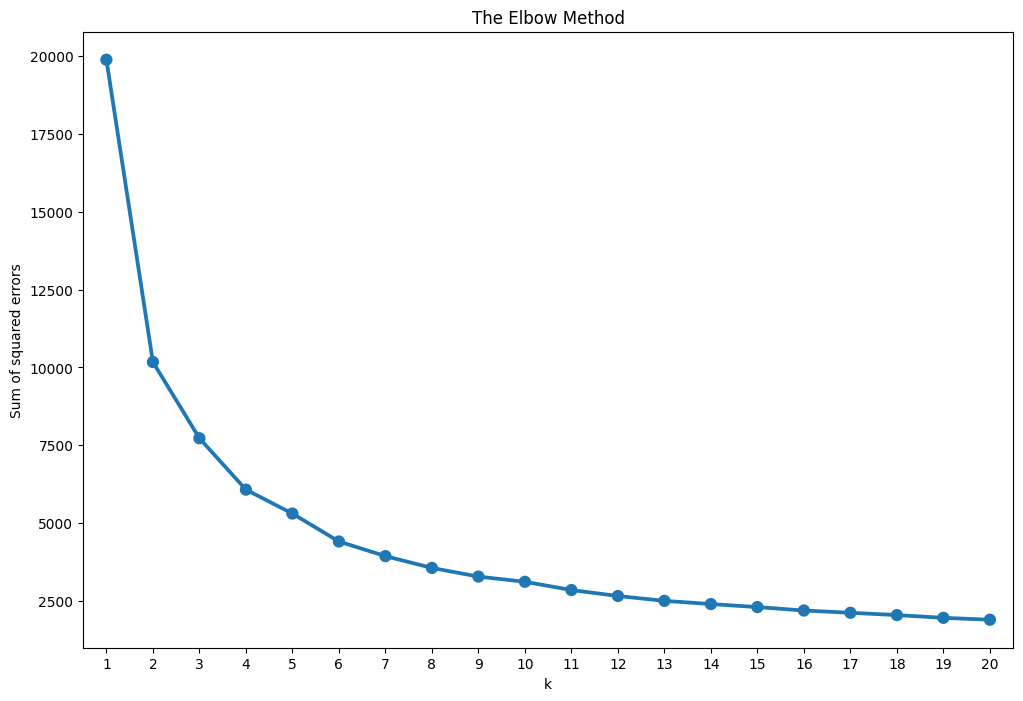

In [68]:
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

>**Observations :-**

  -  -  Here we can see that Optimal value for cluster came out to be  3 Or  4 .

In [69]:
kmeans = KMeans(n_clusters=3, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [70]:
# Create a cluster label column in the original DataFrame
data_norm_k3 = data_norm.assign(Cluster = cluster_labels)
data_k3 = data_norm.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       0.0      6.0  1798
1           2.0       2.0      8.0   801
2           4.0       1.0      7.0  1740

In [71]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt3 = pd.melt(data_norm_k3.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Attribute',
                    value_name='Value')

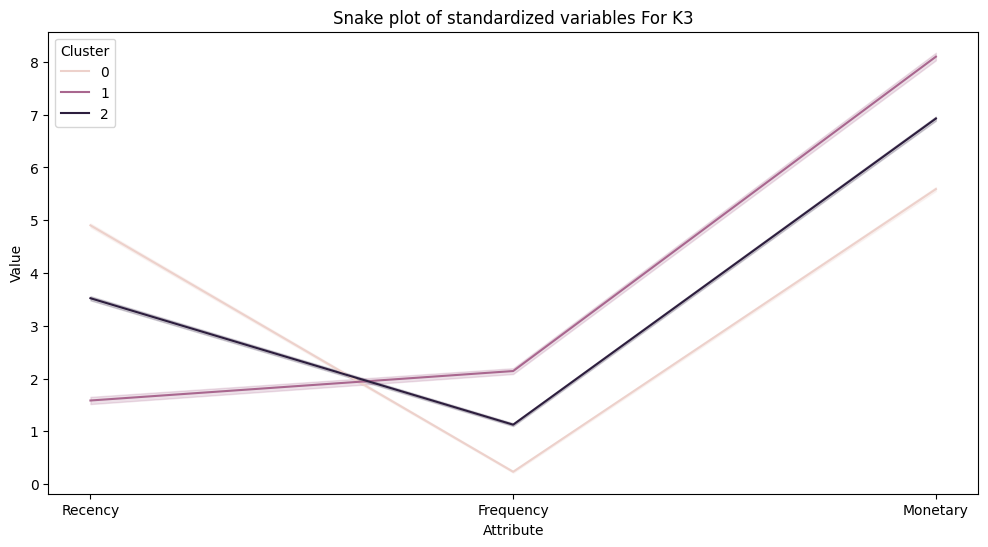

In [82]:
plt.figure(figsize=(12,6))
plt.title('Snake plot of standardized variables For K3')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt3);

> ## Observations 

- Cluster 1 has the lowest mean Recency (2.0), indicating that customers in this cluster made purchases most recently.

- Cluster 1 also has the highest mean Frequency (2.0) and Monetary (8.0), suggesting that customers in this cluster make more frequent purchases and spend more per - 

   transaction compared to the other clusters.

- Cluster 0 has the highest count (1798 customers), followed by Cluster 2 (1740 customers), and then Cluster 1 (801 customers).

In [85]:
kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels_4 = kmeans.labels_

In [86]:
# Create a cluster label column in the original DataFrame
data_norm_k4 = data_norm.assign(Cluster = cluster_labels_4)
data_k4 = data_norm.assign(Cluster = cluster_labels_4)

# Calculate average RFM values and size for each cluster
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       0.0      6.0  1519
1           2.0       2.0      8.0   713
2           4.0       1.0      7.0  1218
3           3.0       1.0      6.0   889

In [75]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(data_norm_k4.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Attribute',
                    value_name='Value')

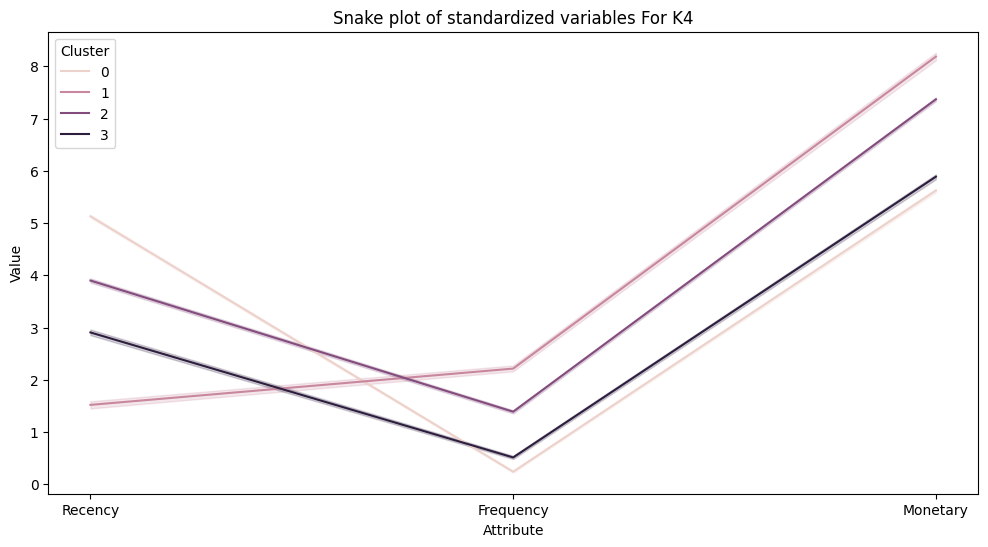

In [76]:

plt.figure(figsize=(12,6))
plt.title('Snake plot of standardized variables For K4')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt);

> - ## Observations :- 

**Distinct Cluster Separation:** The snake plot shows clear differences in the distribution of the three metrics (Recency, Frequency, MonetaryValue) across the four clusters. Each cluster occupies a unique space on the plot, indicating that customers within each cluster exhibit consistent patterns in their purchasing behavior.

**Heterogeneous Mix of Clusters:** The fact that the clusters are well-separated suggests that the customer base is diverse, with different segments exhibiting varying levels of recency, frequency, and monetary value. This heterogeneity is beneficial for targeted marketing efforts, as it allows for the customization of strategies to address the specific needs and preferences of each cluster.

**Opportunities for Targeted Marketing:** With distinct clusters identified, marketers can tailor their strategies to target each segment more effectively. By understanding the unique characteristics of each cluster, such as their purchasing frequency and monetary value, marketers can develop tailored campaigns and promotions to maximize engagement and drive sales.

**In summary, the observed heterogeneity among the clusters indicates opportunities for targeted marketing strategies that address the specific needs and preferences of different customer segments, ultimately leading to improved customer satisfaction and business performance.**

In [77]:
#calculates the population average 
cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = cluster_avg.head().mean()
population_avg

Recency      3.365103
Frequency    1.090498
Monetary     6.767293
dtype: float64

In [78]:
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,5.130608,0.241509,5.623188
1,1.521168,2.215541,8.187254
2,3.901089,1.390203,7.369810
3,2.907547,0.514739,5.888922


In [79]:
#calculating the relative importance of each cluster's metrics compared to the population average.
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.52,-0.78,-0.17
1,-0.55,1.03,0.21
2,0.16,0.27,0.09
3,-0.14,-0.53,-0.13


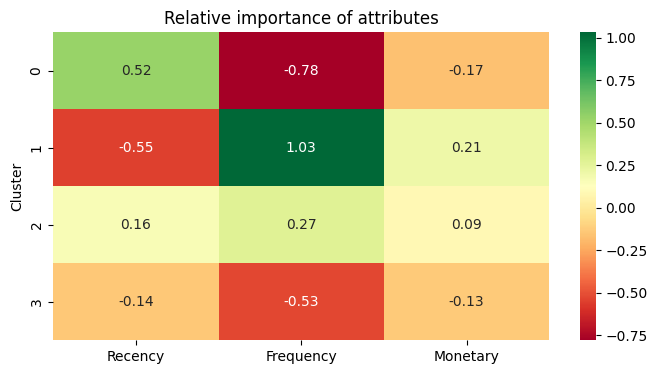

In [80]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

> - ## Observations :- 


From the above heatmap indicates the relative importance of each metric (Recency, Frequency, MonetaryValue) for each cluster compared to the population average

**Cluster 0:**
- Recency: The value of 0.52 suggests that customers in Cluster 0 tend to have a recency slightly above the population average.
- Frequency: The value of -0.78 indicates that the frequency of purchases for customers in Cluster 0 is lower than the population average.
- MonetaryValue: The value of -0.17 suggests that the monetary value of purchases for customers in Cluster 0 is slightly lower than the population average.

**Cluster 1:**
- Recency: The value of -0.55 suggests that customers in Cluster 1 tend to have a recency below the population average.
- Frequency: The value of 1.03 indicates that the frequency of purchases for customers in Cluster 1 is significantly higher than the population average.
- MonetaryValue: The value of 0.21 suggests that the monetary value of purchases for customers in Cluster 1 is higher than the population average.

**Cluster 2:**
- Recency: The value of 0.16 suggests that customers in Cluster 2 tend to have a recency slightly above the population average.
- Frequency: The value of 0.27 indicates that the frequency of purchases for customers in Cluster 2 is slightly higher than the population average.
- MonetaryValue: The value of 0.09 suggests that the monetary value of purchases for customers in Cluster 2 is slightly higher than the population average.

**Cluster 3:**
- Recency: The value of -0.14 suggests that customers in Cluster 3 tend to have a recency slightly below the population average.
- Frequency: The value of -0.53 indicates that the frequency of purchases for customers in Cluster 3 is lower than the population average.
- MonetaryValue: The value of -0.13 suggests that the monetary value of purchases for customers in Cluster 3 is slightly below the population average.

> ## Recommendations:-
Based on the relative importance of each metric for each customer segment, here are some recommendations to keep in mind while designing marketing strategies for each segment:

**Cluster 0:**
- These customers have a slightly above-average recency, lower frequency, and slightly lower monetary value.
- Targeted strategies could focus on incentivizing repeat purchases through personalized promotions or loyalty programs.
- Emphasize the value proposition to encourage higher spending per transaction.

**Cluster 1:**
- Customers in this segment have below-average recency, high frequency, and higher monetary value.
- Retention strategies could focus on maintaining engagement and ensuring consistent repeat purchases.
- Explore opportunities to aspell or cross-sell additional products or services to maximize revenue from these frequent purchasers.

**Cluster 2:**
- These customers have slightly above-average recency, frequency, and monetary value.
- Strategies could involve maintaining customer satisfaction through personalized communication and targeted offers.
- Encourage brand advocacy and referral programs to leverage the loyalty of these customers and attract similar prospects.

**Cluster 3:**
- Customers in this segment have slightly below-average recency, lower frequency, and slightly lower monetary value.
- Marketing efforts could focus on re-engaging these customers through reactivation campaigns or win-back offers.
- Highlight the value proposition and benefits of returning to make a purchase to incentivize repeat business.

In [81]:
# calculate these evaluation metrics for the KMeans clustering model:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering_model(data, cluster_labels):
    """
    Evaluate the performance of a clustering model using silhouette score,
    Davies-Bouldin index, and Calinski-Harabasz index.
    
    Args:
    - data: The preprocessed data used for clustering
    - cluster_labels: Cluster labels assigned by the clustering model
    
    Returns:
    - silhouette_avg: Silhouette score
    - db_index: Davies-Bouldin index
    - ch_index: Calinski-Harabasz index
    """
    # Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(data, cluster_labels)

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(data, cluster_labels)
    
    return silhouette_avg, db_index, ch_index

In [90]:
# Evaluate the clustering model for K = 3
silhouette_avg_k3, db_index_k3, ch_index_k3 = evaluate_clustering_model(data_norm_k3, cluster_labels)
print("Evaluation Metrics for K=3:")
print("Silhouette Score:", silhouette_avg_k3)
print("Davies-Bouldin Index:", db_index_k3)
print("Calinski-Harabasz Index:", ch_index_k3)

# Evaluate the clustering model for K = 4
silhouette_avg_k4, db_index_k4, ch_index_k4 = evaluate_clustering_model(data_norm_k4, cluster_labels_4)
print("\nEvaluation Metrics for K=4:")
print("Silhouette Score:", silhouette_avg_k4)
print("Davies-Bouldin Index:", db_index_k4)
print("Calinski-Harabasz Index:", ch_index_k4)

Evaluation Metrics for K=3:
Silhouette Score: 0.3720615641912597
Davies-Bouldin Index: 1.0383374251707147
Calinski-Harabasz Index: 3379.189327752183

Evaluation Metrics for K=4:
Silhouette Score: 0.4767323694831021
Davies-Bouldin Index: 0.8342113427288473
Calinski-Harabasz Index: 4668.111403386358
